<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-1/blob/main/Otras_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problema

El famoso juego $7-11$, requiere que el jugador lance 2 dados una o más veces hasta tomar la decisión de que se gana o se pierde el juego. El juego se gana si en el primer lanzamiento los dados suman $7$ u $11$, ó aparece un $4, 5, 6, 8, 9$ ó $10$ en el primer lanzamiento y la misma suma reaparece antes de que aparezca un $7$.

Por otra parte, el juego se pierde si en el primer lanzamiento los dados suman $2, 3$ ó $12$, o aparece un $4, 5, 6, 8, 9$ ó $10$ en el primer lanzamiento y luego sale un $7$ antes de que se repita el primer lanzamiento. Si el valor de la apuesta es de $\$1$ y la ganancia cada vez que se gana un juego es de $\$1$, ¿Cuál es la probabilidad de quiebras si la cantidad inicial disponible es de $\$20$?  (asuma que el juego también se termina cuando se acumulan $\$50$)

In [20]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
def tirar_dados():
    """
    Simula el lanzamiento de dos dados y determina el evento que ocurre (ganancia, pérdida o punto).
    """
    eventos = {1: [7, 11], 2: [2, 3, 12], 3: [4, 5, 6, 8, 9, 10]}

    dado1 = rd.randint(1, 6)  # Tiramos dado 1
    dado2 = rd.randint(1, 6)  # Tiramos dado 2

    suma_dados = dado1 + dado2  # Sumamos los valores de los dados
    estado = False
    evento = 1
    while not estado:
        if evento in eventos and suma_dados in eventos[evento]:
            estado = True
            return evento, suma_dados  # Regresamos el evento y la suma de los dados
        else:
            evento += 1

In [22]:
def evento_punto(punto_objetivo):
    """
    Simula el evento 'punto' hasta que el jugador gane o pierda.
    """
    estado = True
    ganancia = 0
    perdida = 0
    while estado:
        _, suma_punto = tirar_dados()  # Lanzamos los dados nuevamente

        if suma_punto == punto_objetivo:  # Si la suma es igual al punto objetivo, ganamos
            ganancia = 1
            estado = False
            turno = False
            return ganancia, perdida, turno

        elif suma_punto == 7:  # Si la suma es 7, perdemos
            perdida = 1
            estado = False
            turno = False
            return ganancia, perdida, turno

In [23]:
def jugar():
    """
    Simula el juego para un jugador.
    """
    ganancia = 0
    perdida = 0
    turno = True
    while turno:
        evento, suma_dados = tirar_dados()  # Lanzamos los dados

        if evento == 1:  # Ganamos $1
            ganancia = 1
            turno = False
            return ganancia, perdida
        elif evento == 2:  # Perdemos $1
            perdida = 1
            turno = False
            return ganancia, perdida
        elif evento == 3:  # Evento 'punto'
            ganancia, perdida, turno = evento_punto(suma_dados)
            return ganancia, perdida

In [24]:
def simular_juego():
    """
    Simula el juego completo entre dos jugadores.
    """
    saldo_neto = 20  # Inicialmente tenemos $20 para jugar
    jugador_actual = rd.randint(1, 2)  # Determinamos aleatoriamente quién empieza

    while True:
        ganancia, perdida = jugar()  # El jugador actual tira los dados
        saldo_neto += ganancia - perdida  # Actualizamos el saldo neto

        if saldo_neto <= 0:  # Evaluamos si el saldo es 0 o menos
            return 0  # Perdimos todo el dinero
        elif saldo_neto >= 70:  # Evaluamos si el saldo es 70 o más
            return 1  # Ganamos $50

        if perdida == 1:  # Si hay pérdida, cambiamos el turno al otro jugador
            jugador_actual = 3 - jugador_actual  # Alterna entre 1 y 2

In [25]:
def estimar_probabilidad(iteraciones):
    """
    Estima la probabilidad de quedarse sin dinero después de un número dado de iteraciones.
    """
    probabilidades = []
    exitos = 0
    for i in range(iteraciones):
        resultado = simular_juego()
        if resultado == 0:  # Contamos los eventos en los que nos quedamos sin dinero
            exitos += 1
        probabilidad = exitos / (i + 1)
        probabilidades.append(probabilidad)
    return probabilidades

Media de probabilidades =  0.8768777602688224
Desviación estándar =  0.010948818421741448


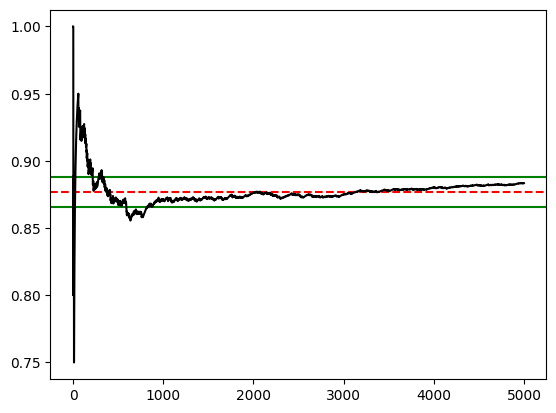

In [30]:
# Estimación de la probabilidad de quedarse sin dinero
resultados_estimacion = estimar_probabilidad(5000)

media_resultados = np.mean(resultados_estimacion)  # Calculamos la media de las probabilidades
desviacion_estandar = np.std(resultados_estimacion)  # Calculamos la desviación estándar

print("Media de probabilidades = ", media_resultados)
print("Desviación estándar = ", desviacion_estandar)

# Graficamos un intervalo de confianza de un error estándar
plt.axhline(media_resultados, color='r', linestyle='--')  # Media
plt.axhline((desviacion_estandar + media_resultados), color='g')  # Límite superior del intervalo
plt.axhline((-desviacion_estandar + media_resultados), color='g')  # Límite inferior del intervalo
plt.plot(resultados_estimacion,color="k")
plt.show()

¿Cual valor de $N$ elegir?
Se ve que una muestra $N\approx 250$ da un resutado aceptable.

Ademas:
Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$


In [32]:
# Calculando el valor crítico de la distribución
p_confianza = 0.90
error_estandar = desviacion_estandar / (500 ** 0.5)
valor_critico = stats.norm.ppf((1 + p_confianza) / 2)

intervalo_inferior = media_resultados - valor_critico * error_estandar
intervalo_superior = media_resultados + valor_critico * error_estandar

print(f"Intervalo de confianza del {p_confianza * 100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.8760723641953108, 0.877683156342334)


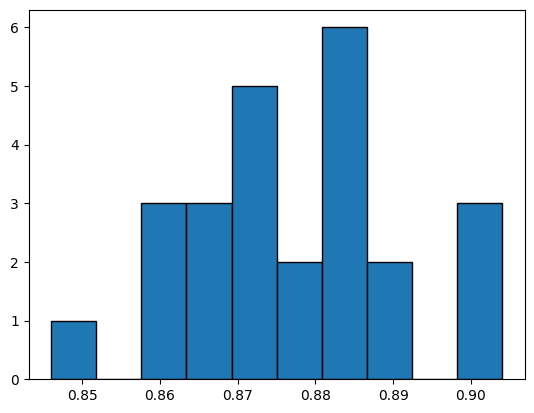

In [35]:
# Simulación de múltiples experimentos
num_experimentos = 25

def simular_multiples_experimentos(num_experimentos):
    """
    Realiza múltiples simulaciones del experimento de juego.
    """
    resultados = []
    for i in range(num_experimentos):
        resultado_experimento = estimar_probabilidad(500)
        resultados.append(resultado_experimento[-1])
    return resultados

resultados_simulacion = simular_multiples_experimentos(num_experimentos)
plt.hist(resultados_simulacion, bins=10, edgecolor="black")
plt.show()